# Praktikum Visi Komputer
## Modul ke-5

## Ekstraksi fitur

Pada modul ini, kita akan belajar cara mendeteksi titik-titik penting, atau dikenal juga sebagai keypoint, dari suatu citra. Kita akan membahas alasan mengapa keypoint ini penting dan bagaimana menggunakannya untuk memahami konten suatu citra. Selain itu kita juga akan membahas beberapa teknik yang digunakan untuk mendeteksi keypoint dan memahami bagaimana kita dapat mengekstraksi fitur dari suatu citra tertentu.


### Keypoint? What for?

Analisis konten citra/gambar merupakan proses untuk memahami konten daripada suatu citra sehingga kita dapat menentukan aksi tertentu berdasarkan hasil pemahaman tersebut. Untuk memahami keypoint, kita perhatikan bagaimana manusia melakukannya. Otak kita ini sebetulnya mesin yang sangat canggih, yang dapat melakukan hal yang rumit dengan sangat cepat. Ketika manusia melihat sesuatu, otak manusia secara otomatis mencipta jejak (footprint) berdasarkan aspek-aspek "menarik" pada citra. Kita akan lihat makna dari kata "menarik" tersebut pada bahasan modul ini.

Pada bahasan awal ini, aspek menarik yang dimaksud berupa sesuatu yang berbeda di dalam suatu kawasan/region. Jika kita menganggap suatu titik menarik, berarti tidak ada titik tetangganya yang memenuhi constraint/batasan (supaya dianggap menarik) pada kawasan tersebut. 

Coba lihat [gambar berikut ini](https://i.im.ge/2021/09/22/TCa229.png). Lalu tutup mata anda dan bayangkan gambar tersebut. Apakah ada sesuatu yang spesial pada gambar tersebut? Bisa bayangkan, apa yang berbeda di sebelah kiri gambar? Kemungkinan besar jawaban anda adalah tidak ada yang berbeda, hanya gambar warna biru polos. Hal ini disebabkan gambar tersebut tidak memiliki informasi menarik. Ketika mata melihat dan otak memproses gambar seperti itu, maka tidak ada catatan penting tentang gambar yang akan disimpan. 

Coba lihat [gambar berikut ini](https://i.im.ge/2021/09/23/TCicz0.png). Lalu tutup mata anda dan bayangkan gambar tersebut. Anda akan mengingat kembali detil gambar tersebut dengan sangat jelas. Hal ini disebabkan karena terdapat banyak kawasan/region penting pada gambar tersebut. Mata manusia lebih sensitif terhadap konten berfrekuensi tinggi dibandingkan konten berfrekuensi rendah. Inilah alasannya kita dapat dengan mudah mengingat kembali gambar kedua tadi dibandingkan gambar yang pertama. 

Kita lanjutkan percobaan, coba lihat [gambar berikut ini](https://i.im.ge/2021/09/23/TCiRjc.png). Apabila anda perhatikan, mata anda akan segera bergerak ke bagian remote TV, walaupun letaknya di ujung sekali, bukan di tengah. Kita biasanya akan otomatis bergerak menuju kawasan/region 'menarik' pada suatu gambar sebab pada bagian itulah informasi bisa didapatkan. Inilah yang disimpan oleh otak untuk keperluan mengingat kembali.

Sehingga saat kita membangun sistem pengenal/rekognisi objek, kita perlulah mendeteksi kawasan/region **"menarik"** tersebut untuk menghasilkan *signature* bagi citra tersebut. Kawasan menarik ini dikarakteristikkan oleh keypoint. Inilah mengapa deteksi keypoint sangatlah penting pada sistem visi komputer (computer vision system).


### Makna keypoint

Sekarang kita sudah lebih paham bahwa keypoint merujuk pada kawasan menarik di dalam suatu citra. Jadi keypoint ini terdiri dari apa? Di mana letak keypoint? 

Ketika kita mengatakan "menarik", maka maknanya ada sesuatu yang terjadi pada kawasan citra tersebut. Jika kawasannya uniform (sama saja bentuknya), maka tentulah tidak terlalu menarik. Sebagai contoh, suatu sudut adalah menarik karena ada perubahan yang tajam pada intensitas dari dua arah berlainan. Setiap sudut menjadi titik unik di mana dua sisi bertemu. Apabila kita perhatikan [gambar sebelumnya ini](https://i.im.ge/2021/09/23/TCiRjc.png), anda dapat melihat bahwa kawasan menarik tidak hanya terdiri dari konten "menarik".

Kita lihat contoh [gambar lainnya berikut ini](https://i.im.ge/2021/09/23/TCiVUx.png). Kita perhatikan bahwa bagian interior dari kawasan menarik ini "tidak menarik".

<a href="https://im.ge/i/TCik4J"><img src="https://i.im.ge/2021/09/23/TCik4J.md.png" alt="TCik4J.md.png" border="0"></a>

Jadi apabila kita ingin mengkarakteristikkan objek ini, kita perlu memastikan untuk memilih titik-titik menarik. Namun, bagaimana cara mendefinisikan "titik-titik menarik"? Dapatkan kita berpikir bahwa sesuatu yang bukan tidak menarik adalah "titik-titik menarik"? Kita perhatikan gambar berikut ini.

<a href="https://im.ge/i/TCipyS"><img src="https://i.im.ge/2021/09/23/TCipyS.png" alt="TCipyS.png" border="0"></a>

Pada gambar tersebut terdapat banyak konten berfrekuensi tinggi sepanjang tepinya. Namun kita tidak bisa menganggap semua tepi ini "menarik". Perlu dipahami bahwa "menarik" tidak hanya merujuk pada warna dan nilai intensitas. Namun sesuatu "menarik" yang dimaksud bisa apa saja, sepanjang hal tersebut berbeda. Kita perlu mengisolasi titik-titik yang unik pada daerah sekitarnya (neighborhood). Titik-titik sepanjang tepi tidak menarik jika dibandingkan dengan daerah sekitarnya. 

Jadi bagaimana kita memilih titik menarik? Coba perhatikan sudut meja. Sudut ini unik jika dibandingkan dengan daerah sekelilingnya, yang tidak ada bentuk lain yang sama. Jadi cukup "menarik" kan? Jadi titik ini dapat dipilih sebagai salah satu dari keypoint. Kita akan mengambil banyak keypoint untuk mengkarakteristikkan suatu gambar tertentu.

Saat kita melakukan analisis citra (image analysis), kita perlu mengkonversi keypoint menjadi bentuk numerik sebelum kita menarik kesimpulan. Keypoint-keypoint ini akan direpresentasikan dalam bentuk numerik, lalu kombinasi dari semua keypoint tersebut digunakan untuk membuat *image signature*. Kita ingin *image signature* ini dapat mewakilkan citra yang diberikan dengan baik.


### Deteksi sudut

Pada penjelasan sebelumnya kita sudah tahu bahwa sudut adalah suatu hal yang "menarik". Maka di sini kita akan melihat bagaimana cara mendeteksinya. Dalam bidang visi komputer, terdapat teknik deteksi sudut yang terkenal yaitu **Harris Corner Detector**. Pada teknik ini, secara ringkasnya kita membangun matriks 2x2 berbasis *partial derivative* dari citra grayscale, kemudian menganalisa eigenvalue. Artikel paper aslinya dapat dibaca di [sini](http://www.bmva.org/bmvc/1988/avc-88-023.pdf). Suatu titik sudut merupakan titik yang memiliki nilai eigenvalue yang besar.
Perhatikan gambar berikut ini:

<a href="https://im.ge/i/TCwtW0"><img src="https://i.im.ge/2021/09/23/TCwtW0.md.png" alt="TCwtW0.md.png" border="0"></a>

Apabila kita menjalankan teknik Harris Corner Detector pada gambar tersebut, maka akan muncul gambar berikut.

<a href="https://im.ge/i/TCwCUc"><img src="https://i.im.ge/2021/09/23/TCwCUc.md.png" alt="TCwCUc.md.png" border="0"></a>

Seperti yang terlihat pada gambar di atas, semua titik hitam merupakan sudut pada gambar. Jika kita perhatikan, sudut pada bagian bawah kotak tidak terdeteksi. Hal ini disebabkan karena sudut tersebut tidak cukup tajam. Namun anda dapat mengubah *threshold* pada corner detector agar dapat mendeteksi sudut tersebut. Kode programnya seperti di bawah.


In [1]:
#Deteksi sudut

import cv2
import numpy as np

#download gambar di https://i.im.ge/2021/09/23/TCwtW0.md.png
img = cv2.imread('Prak5/gambar/box.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 4,5, 0.04) # to detect only sharp corners
#dst = cv2.cornerHarris(gray, 14, 5, 0.04) # to detect soft corners

# Result is dilated for marking the corners
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01*dst.max()] = [0,0,0]

cv2.imshow('Harris Corners',img)
cv2.waitKey()

-1

### Good feature to track

Harris corner detector sebenarnya memiliki performa yang baik pada banyak kasus, namun masih tetap ada yang tertinggal. Sekitar 6 tahun setelah paper asli dari Harris dan Stephen, Shi-Tomasi muncul dengan corner detector yang lebih baik. Papernya dapat dibaca di [sini](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf). Shi-Tomasi menggunakan fungsi scoring yang berbeda untuk memperbaiki kualitas secara keseluruhan. Dengan menggunakan metode ini, kita dapat menemukan 'N' sudut terkuat pada citra yang diberikan. Hal ini sangat berguna ketika kita tidak perlu menggunakan setiap sudut untuk melakukan ekstraksi informasi dari citra. Kode programnya seperti di bawah.


In [2]:
#Deteksi dengan Good feature to track

import cv2
import numpy as np

img = cv2.imread('Prak5/gambar/box.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 7, 0.05, 25)
corners = np.float32(corners)

red_color = (0, 0, 255)

for item in corners:
    x, y = item[0]
    cv2.circle(img, (int(x),int(y)), 5, red_color, -1)
    
cv2.imshow("Top 'k' features", img)
cv2.waitKey()

-1

### Scale Invariant Feature Transform (SIFT)

Walaupun fitur sudut ini "menarik", namun belum cukup untuk mengkarakteristikkan bagian menarik yang sebenarnya. Saat kita membahas tentang analisis konten citra, kita ingin *image signature* bersifat *invariant* (tidak berubah) terhadap proses seperti pembesaran (scale), rotasi (rotation), cahaya (illumination) dan lainnya. 

Manusia sangat mahir dalam hal ini. Misalkan diberikan suatu gambar apel yang terbalik dan tidak cerah warnanya, manusia dapat tetapi mengenalinya. Apabila gambar yang diberikan sudah diperbesar, manusia dapat tetap mengenalinya. Kita ingin agar sistem pengenal citra dapat melakukan hal yang sama.

Kita pertimbangkan fitur sudut. Ternyata apabila citra diperbesar, sudut dapat berhenti menjadi sudut seperti pada gambar berikut.

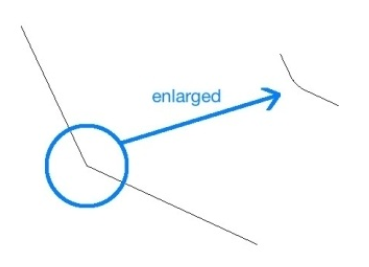

Kedua sudut pada gambar di atas sebenarnya berasal dari gambar yang sama. Detector tidak dapat mendeteksi sudut pada gambar yang sudah diperbesar. Sehingga gambar sudut kedua, tidak *matching*/sepadan dengan gambar sudut pertama. Hal ini menandakan bahwa *corner detector* tidak bersifat *scale invariant*. Sehingga kita memerlukan metode lain untuk mengkarakteristikkan citra.

SIFT (Scale Invariant Feature Transform) merupakan salah satu algoritma yang terkenal dalam bidang visi komputer. Detil algoritma SIFT dapat dibaca pada [artikel ini](http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf). Algoritma SIFT dapat digunakan untuk mengekstrak keypoint dan membangun *feature descriptor* yang sesuai. Untuk mengidentifikasikan keypoint yang potensial, SIFT membangun piramida dari berbagai jenis ukuran citra yang dikaji lalu menghitung **Difference of Gaussian (DoG)**. Jadi kita menjalankan filter Gaussian pada setiap level lalu mengambil perbedaannya (difference) pada setiap level piramida. 

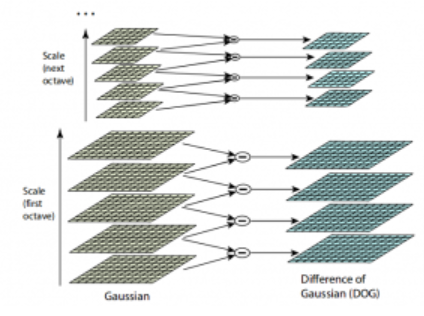

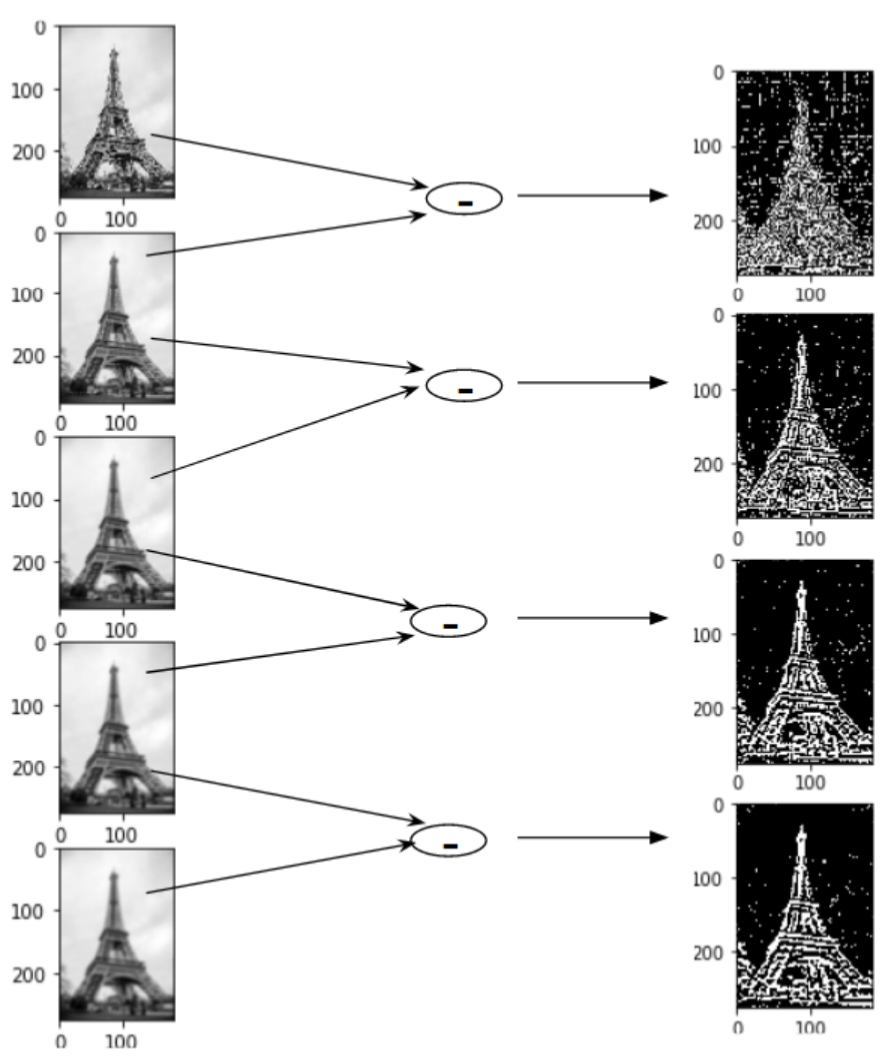

Kemudian proses berlanjut untuk mendeteksi titik sekarang sebagai keypoint dengan membandingkannya dengan titik tetangganya (neighboring) juga dengan titik-titik tetangga pada citra yang bertetanggaan pada level piramida. Titik yang terpilih sebagai keypoint adalah titik maxima. Hal inilah yang menjadikan algoritma SIFT menjad *scale invariant*.

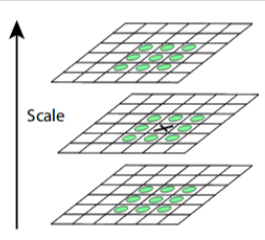

Sesudah keypoint berhasil diidentifikasi, setiap keypoint akan diberikan orientasi. Kita ambil titik tetangga dari setiap keypoint lalu menghitung *gradient magnitude* (intensitas piksel) dan arahnya. Informasi ini memadankan keypoint ini ke titik yang sama pada gambar yang lain walaupun gambar itu sudah dirotasi. 

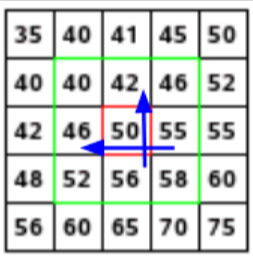

G(x): gradient x berupa pengurangan antara 55 & 46, hasilnya Gx = 9. G(y): gradient y berupa pengurangan antara 56 & 42, hasilnya Gy = 14.

Berikutnya dicari magnitude dan orientasinya:

Magnitude =  √[(Gx)2+(Gy)2]  =  16.64

Φ = atan(Gy / Gx) = atan(1.55) = 57.17

Berikutnya membuat histogram magnitude dan orientasi. Dari informasi tersebut, barulah dibuat *keypoint descriptor*. 

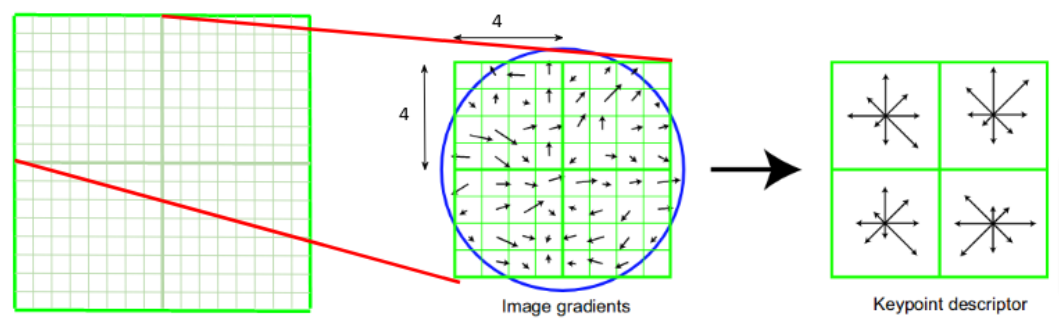


In [3]:
#Ekstraksi fitur dengan SIFT
#Kode berikut ini untuk mengakali SIFT yang hanya bisa digunakan pada library opencv-contrib-python
import cv2

#Download gambar di https://i.im.ge/2021/09/23/TCAVhY.png
img = cv2.imread('Prak5/gambar/img12.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints = sift.detect(gray,None)
cv2.drawKeypoints(gray,keypoints,img)
#cv2.drawKeypoints(img, keypoints, img, (51, 163, 236), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT features', img)
cv2.waitKey()

-1

Karena banyak algoritma ekstraksi fitur memerlukan library opencv-contrib-python maka kita akan sedikit mengubah library opencv yang digunakan. Kita uninstall library opencv yang sebelumnya dengan cara: `pip uninstall opencv-python` lalu kita install opencv-contrib-python dengan cara: `pip install opencv-contrib-python`. Kemudian coba code berikut, untuk mengetahui apakah SIFT sudah dikenal atau belum.

In [4]:
import cv2
sift = cv2.xfeatures2d.SIFT_create()

In [5]:
#Ekstraksi fitur dengan SIFT
#Kode berikut ini apabila anda sudah berhasil install opencv-contrib-python

import cv2
import numpy as np

input_image = cv2.imread('Prak5/gambar/img12.png')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(gray_image, None)
input_image = cv2.drawKeypoints(img, keypoints, img, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT features', input_image)
cv2.waitKey()

-1

### Speeded Up Robust Features (SURF)

Walaupun SIFT berjalan baik dan berguna, namun algoritma ini *computationally intensive*. Maknanya algoritma ini lambat sehingga kurang sesuai digunakan pada sistem real-time. Oleh karena itu, kita perlu sistem yang cepat dan memiliki semua kelebihan dari SIFT. Kita ingat kembali, SIFT menggunakan DoG untuk membangun piramida dan proses ini adalah lambat. Jadi untuk mengatasi masalah ini, SURF (Speeded Up Robust Features) menggunakan filter kotak sederhana untuk memperkirakan nilai Gaussian. Ternyata proses ini mudah dikomputasi dan jauh lebih cepat. SURF terdiri dari 2 langkah utama yaitu ekstraksi fitur dan deskripsi fitur. SURF juga memanfaatkan citra integral (integral image). Komputasinya memanfaatkan Hessian matrix. Artikel asli mengenai SURF dapat dibaca di [sini](http://www.vision.ee.ethz.ch/~surf/eccv06.pdf).


In [6]:
#Ekstraksi fitur dengan SURF
#Namun sayangnya code ini tidak dapat dijalankan sebab SURF ini dipatenkan dan OpenCV versi >3 
#telah mengeluarkan semua non-free algorithm

import cv2
import numpy as np

img = cv2.imread('Prak5/gambar/img12.png')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create(500)

# This threshold controls the number of keypoints
surf.hessianThreshold = 15000

kp, des = surf.detectAndCompute(gray, None)
img = cv2.drawKeypoints(img, kp, None, (0,255,0), 4)

cv2.imshow('SURF features', img)
cv2.waitKey()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-u4kjpz2z\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


### Features from Accelerated Segment Test (FAST)

Sebenarnya SURF sudah jauh lebih cepat dari SIFT, namun sayangnya masih juga kurang cepat untuk penggunaan pada sistem real-time, terutama bila ada batasan sumber daya (resource). Misalnya kita membangun aplikasi real-time pada perangkat mobile, maka kita akan kesulitan untuk menggunakan SURF. Oleh karena itu, kita perlu suatu algoritma yang cepat dan *computationally inexpensive*. Maka Rosten dan Drummond muncul dengan algoritma FAST (Features from Accelerated Segment Test). Sesuai dengan namanya, algoritma ini sangatlah cepat. Namun algoritma FAST hanya berupa deteksi keypoint saja. Sesudah keypoint terdeteksi, maka kita masih memerlukan algoritma SIFT atau SURF untuk melakukan komputasi descriptor. 


In [7]:
#Deteksi fitur dengan FAST

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#Download gambar di https://i.im.ge/2021/09/24/TCYzzF.png
img = cv.imread('Prak5/gambar/img13.png',0) 

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
#cv.imwrite('fast_true.png', img2)
cv.imshow('FAST features dengan semua defaul parameter', img2)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
#cv.imwrite('fast_false.png', img3)
#plt.imshow(img3)
cv.imshow('FAST features dengan nonmaxSuppression', img3)
cv.waitKey()

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 4645
Total Keypoints without nonmaxSuppression: 14277


-1

### Binary Robust Independent Elementary Features (BRIEF)

Algoritma FAST dapat secara cepat mendeteksi keypoints, namun kita masih memerlukan SIFT atau SURF untuk menghitung descriptor. Jadi kita perlu cara yang cepat untuk menghitung descriptor. BRIEF merupakan metod untuk melakukan ekstraksi fitur descriptor. Algoritma ini tidak dapat mendeteksi keypoint, sehingga algoritma ini digunakan bersamaan dengan algoritma deteksi keypoint. Namun kelebihan BRIEF ini adalah compact dan cepat.


In [8]:
#Keypoint descriptor dengan BRIEF

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('Prak5/gambar/img13.png',0)

# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img,None)

# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)

print( brief.descriptorSize() )
print( des.shape )

img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imshow('FAST features dengan BRIEF', img2)
cv.waitKey()

32
(101, 32)


-1

### Oriented FAST and Rotated BRIEF (ORB)

Sekarang kita sampai pada kombinasi terbaik dari semua teknik yang telah dibahas sebelumnya. Algoritma dikembangkan langsung dari OpenCV lab. ORB (Oriented FAST and Rotated BRIEF) merupakan algoritma pengenal wajah. Algoritma ini tidak memerlukan GPU atau expensive computation sehingga dapat digunakan pada mobile phone. Algoritma ini cepat, *robust* dan opensource yang memanfaatkan algoritma FAST dan BRIEF. Algoritma ini bekerja melakukan pemadanan keypoint. 


In [9]:
#Ekstraksi fitur dengan ORB

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('Prak5/gambar/img13.png',0)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

#plt.imshow(img2), plt.show()
cv.imshow('Ekstraksi fitur dengan ORB', img2)
cv.waitKey()

-1

### Feature Matching

Kita dapat menggunakan ORB untuk menemukan fitur pada citra beserta lokasinya lalu kemudian memadankannya dengan fitur pada citra yang lain.

Di sini kita akan menggunakan Brute-Force Matcher. Brute-Force matcher ini sederhana saja. Algoritma ini memerlukan descriptor dari suatu fitur pada kumpulan fitur lalu dipadankan dengan semua fitur pada kumpulan fitur kedua dengan menggunakan kalkulasi jarak terdekat.


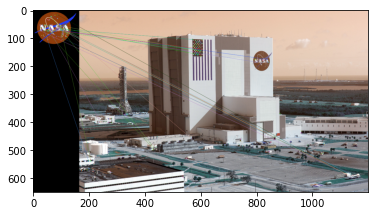

In [16]:
#Feature matching

import numpy as np 
import cv2 
from matplotlib import pyplot as plt
     
#download gambar query di https://i.im.ge/2021/09/24/TCbVi1.png
#download gambar training di https://i.im.ge/2021/09/24/TCbfbf.jpg
# Read the training and query images
query_img = cv2.imread('Prak5/gambar/nasa_logo.png') 
train_img = cv2.imread('Prak5/gambar/kennedy_space_center.jpg') 
 
# Convert the images to grayscale 
query_img_gray = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
train_img_gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 
 
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
 
# Detect keypoints (features) cand calculate the descriptors
query_keypoints, query_descriptors = orb.detectAndCompute(query_img_gray,None) 
train_keypoints, train_descriptors = orb.detectAndCompute(train_img_gray,None) 
 
# Match the keypoints
matcher = cv2.BFMatcher() 
matches = matcher.match(query_descriptors,train_descriptors) 
 
# Draw the keypoint matches on the output image
output_img = cv2.drawMatches(query_img, query_keypoints, 
train_img, train_keypoints, matches[:20],None) 
 
output_img = cv2.resize(output_img, (1200,650)) 
 
# Save the final image 
cv2.imwrite("Prak5/gambar/feature_matching_result.jpg", output_img) 

cv.imshow('Feature matching dengan Brute force', output_img)
plt.imshow(output_img),plt.show()

# Close OpenCV upon keypress
cv2.waitKey(0)
cv2.destroyAllWindows()

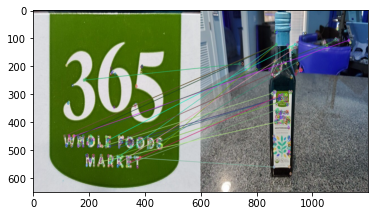

In [14]:
#Latihan 1
#Update program Feature matching dengan menggunakan image yang lain.
#atau bisa pakai image berikut:
#https://i.im.ge/2021/09/24/TCbkGm.jpg
#https://i.im.ge/2021/09/24/TCbH7r.jpg

import numpy as np 
import cv2 
from matplotlib import pyplot as plt
     
# Read the training and query images
query_img = cv2.imread('Prak5/gambar/Prak5-Lat1-1.jpg') 
train_img = cv2.imread('Prak5/gambar/Prak5-Lat1-2.jpg') 
 
# Convert the images to grayscale 
query_img_gray = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
train_img_gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 
 
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
 
# Detect keypoints (features) cand calculate the descriptors
query_keypoints, query_descriptors = orb.detectAndCompute(query_img_gray,None) 
train_keypoints, train_descriptors = orb.detectAndCompute(train_img_gray,None) 
 
# Match the keypoints
matcher = cv2.BFMatcher() 
matches = matcher.match(query_descriptors,train_descriptors) 
 
# Draw the keypoint matches on the output image
output_img = cv2.drawMatches(query_img, query_keypoints, 
train_img, train_keypoints, matches[:20],None) 
 
output_img = cv2.resize(output_img, (1200,650)) 
 
# Save the final image 
cv2.imwrite("Prak5/gambar/Prak5-Lat1_result.jpg", output_img) 

cv2.imshow('Feature matching dengan Brute force', output_img)
plt.imshow(output_img),plt.show()

# Close OpenCV upon keypress
cv2.waitKey(0)
cv2.destroyAllWindows()

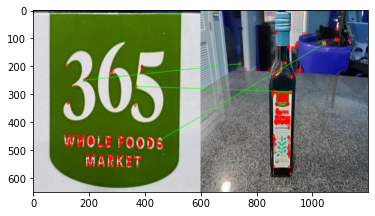

(<matplotlib.image.AxesImage at 0x23a17903c70>, None)

In [15]:
#Latihan 2
#Cari feature matching yang lain seperti algoritma FLANN. Lalu gunakan algoritma tersebut
#untuk memadankan fitur pada image berikut:
#https://i.im.ge/2021/09/24/TCbkGm.jpg
#https://i.im.ge/2021/09/24/TCbH7r.jpg

import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('Prak5/gambar/Prak5-Lat1-1.jpg')      
img2 = cv2.imread('Prak5/gambar/Prak5-Lat1-2.jpg')

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

des1 = np.float32(des1)
des2 = np.float32(des2)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
output_img = cv2.resize(img3, (1200,650)) 
cv2.imwrite("Prak5/gambar/FLANN_result.jpg", output_img) 
plt.imshow(output_img),plt.show()